In [2]:
import pandas as pd
from fuzzywuzzy import fuzz
import numpy as np

c:\Users\chacon1\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:
# 0191 - General Farms, Primarily Crop
states = ['IA', 'OK', 'MO', 'OK', 'AL', 'LA', 'MS', 'IL', 'IN', 'OH', 'KY', 'TN', 'AR', 'NC', 'SC', 'GA']
FILEPATH = "../data/code_0191.csv"
df = pd.read_csv(FILEPATH)

In [16]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,0,OLD RIVER FARM,50 MILLER RD,MIDDLEFIELD,CT,6455,1229.0,7.0,860,2,...,4,580100,4,41.500023,-72.699730,P,25540,2.0,278,9007
1,1,FELIX CHAC CHUO FARMS INC,89785 80TH AVE,THERMAL,CA,92274,8906.0,65.0,760,2,...,6,45605,5,33.468129,-116.098759,P,40140,2.0,348,6065
2,2,C & N PETERSON FARMS INC,30310 455TH AVE,WAKONDA,SD,57073,6300.0,27.0,605,2,...,2,965800,3,42.992997,-97.096458,P,46820,1.0,0,46027
3,3,E-I-E-I-O FARM LLC,1003 NEWFIELD ST,MIDDLETOWN,CT,6457,1817.0,7.0,860,2,...,7,541200,3,41.586472,-72.674690,P,25540,2.0,278,9007
4,4,DRAGO INDIANA,6147 N COUNTY ROAD 500 W,MULBERRY,IN,46058,9445.0,23.0,765,2,...,3,950300,3,40.377054,-86.596185,P,23140,1.0,320,18023


In [18]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['IN', 'SC', 'IL', 'OH', 'MO', 'OK', 'NC', 'LA', 'AR', 'MS', 'TN',
       'GA', 'IA', 'AL', 'KY'], dtype=object)

<Axes: title={'center': 'Number of SIC Code 0191 by State'}, xlabel='STATE', ylabel='Count'>

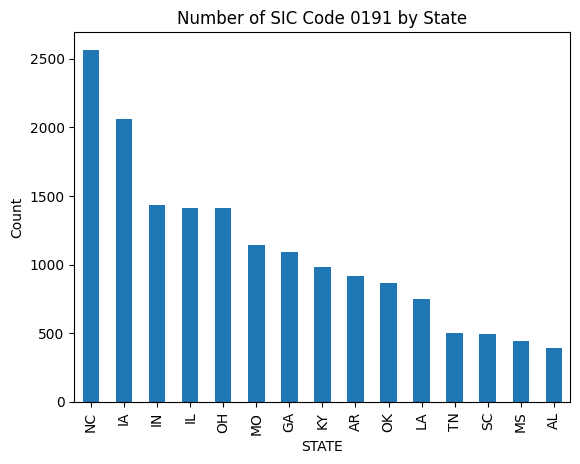

In [39]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of SIC Code 0191 by State")

In [22]:
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
FARMS                                    14285
GENERAL FARMS-PRIMARILY CROP               780
APPLIANCES-HOUSEHOLD-MAJOR-REPAIRING        71
ORGANIC FARMS                               50
TRUCKING                                    43
                                         ...  
CHEMICALS-RETAIL                             1
CUT STONE & STONE PRODUCTS (MFRS)            1
FEED MILL EQUIPMENT & SUPPLIES (MFRS)        1
PAINT-RETAIL                                 1
CORRECTIONAL INSTITUTIONS-PRIVATE            1
Name: count, Length: 366, dtype: int64

In [30]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 15
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['APPLIANCES-HOUSEHOLD-MAJOR-REPAIRING', 'ORGANIC FARMS', 'TRUCKING', 'MARIJUANA GROWERS/CULTIVATORS',
                    'FARM SUPPLIES (WHLS)', 'STABLES', 'CORN', 'REAL ESTATE', 'AGRICULTURAL PRODUCTS', 'FARM EQUIPMENT (WHLS)']    
   
labels_to_keep = ['POULTRY PROCESSING PLANTS (MFRS)', 'POULTRY FARMS']

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in labels_to_keep:
        # print(df.iloc[i]["SIC6_DESCRIPTIONS"])
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame
        # continue
    else:
        # df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame
        continue

In [38]:
df_filter['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY PROCESSING PLANTS (MFRS)    37
POULTRY FARMS                       25
Name: count, dtype: int64

<Axes: title={'center': 'Number of SIC Code 0191 by State'}, xlabel='STATE', ylabel='Count'>

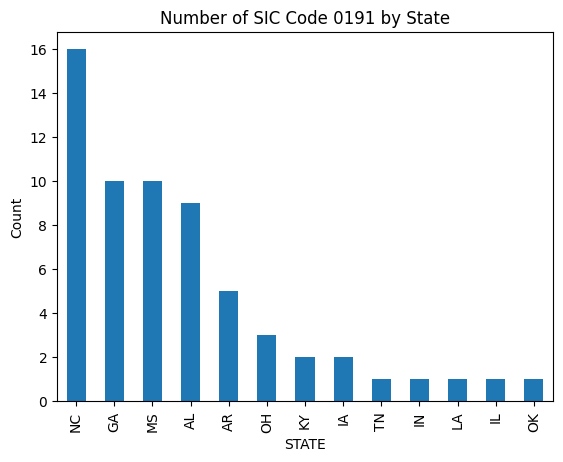

In [40]:
df_filter['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of SIC Code 0191 by State")